In [1]:
from IPython.display import display
import scipyPaperPrinter as jh
import sympy as sy
import os
import sys
thisFile = os.path.abspath("")#os.path.abspath(__file__)
sys.path.append(os.path.abspath(thisFile + '..\\..\\..\\'))

jh.printMarkdown("# Creating a NLP Solver for Optimal Control Problems")

firstParagraph = "" \
+ "I've always found it challenging to take a paper in a journal or a professional pdf " \
+ "found online, and turn it into something that can be used to actually crank out numbers. " \
+ "Part of me making this library is also me learning how to solve a NLP."

jh.printMarkdown(firstParagraph)

secondParagraph = "" \
+ "I want to thank Matthew Kelly for writing several very helpful PDF's, especially \"An Introduction to Trajectory Optimization: How to Do Your Own Direct Collocation\".  This problem is from that paper. " \
+ "To start, we are going to define this simple problem, and then run a trapezoidal rule NLP solver.  You can find that paper here. " \
+ 'https://epubs.siam.org/doi/pdf/10.1137/16M1062569'

jh.printMarkdown(secondParagraph)

# Creating a NLP Solver for Optimal Control Problems

I've always found it challenging to take a paper in a journal or a professional pdf found online, and turn it into something that can be used to actually crank out numbers. Part of me making this library is also me learning how to solve a NLP.

I want to thank Matthew Kelly for writing several very helpful PDF's, especially "An Introduction to Trajectory Optimization: How to Do Your Own Direct Collocation".  This problem is from that paper. To start, we are going to define this simple problem, and then run a trapezoidal rule NLP solver.  You can find that paper here. https://epubs.siam.org/doi/pdf/10.1137/16M1062569

In [2]:
thirdParagraph = "" \
+ "First we will define our problem. This is a 1 dimensional \"block moving\" problem from [An Introduction to Trajectory Optimization: How to Do Your Own Direct Collocation](https://epubs.siam.org/doi/pdf/10.1137/16M1062569). " \
+ "I highly recommend reading that paper.  I will be referring to it a great deal in the coming examples."

jh.printMarkdown(thirdParagraph)

fourthParagraph = \
"The problem has a block moving from 0 to 1 distance units at some speed.  Our control is the force applied to the block. The dynamics are"
jh.printMarkdown(fourthParagraph)

tSy = sy.Symbol('t')
xSy = sy.Function('x')(tSy)
vSy = sy.Function('v')(tSy)
uSy = sy.Function('u')(tSy)
xDotSy = sy.diff(xSy, tSy)
vxDotSy = sy.diff(vSy, tSy)
display(vSy)
jh.showEquation(xDotSy, vSy)
jh.showEquation(vxDotSy, uSy)

fifthParagraph = \
"Over the following time range and with the following boundary conditions:"
jh.printMarkdown(fifthParagraph)

jh.showEquation("t_{initial}", 0)
jh.showEquation("t_{final}", 1)
jh.showEquation("x(0)", 0)
jh.showEquation("x(1)", 1)
jh.showEquation("v_x(0)", 0)
jh.showEquation("v_x(1)", 0)

sixthParagraph = \
"And we want to minimize the force, which for convenience will be minimizing the square of the control"
jh.printMarkdown(sixthParagraph)

display(sy.integrate(uSy**2, (tSy, 0, 1)))

seventhParagraph = \
"This can be solved with calculus of variation techniques. " \
+ "But because we can find a complete solution, it makes a great first test problem. " \
+ "This is a problem in the Lagrange form as it is only an integral. We are going to use "\
+ "the helper type wrapping this problem."

jh.printMarkdown(seventhParagraph)

First we will define our problem. This is a 1 dimensional "block moving" problem from [An Introduction to Trajectory Optimization: How to Do Your Own Direct Collocation](https://epubs.siam.org/doi/pdf/10.1137/16M1062569). I highly recommend reading that paper.  I will be referring to it a great deal in the coming examples.

The problem has a block moving from 0 to 1 distance units at some speed.  Our control is the force applied to the block. The dynamics are

v(t)

Eq(Derivative(x, t), v)

Eq(Derivative(v, t), u)

Over the following time range and with the following boundary conditions:

Eq(t_{initial}, 0)

Eq(t_{final}, 1)

Eq(x(0), 0)

Eq(x(1), 1)

Eq(v_x(0), 0)

Eq(v_x(1), 0)

And we want to minimize the force, which for convenience will be minimizing the square of the control

Integral(u(t)**2, (t, 0, 1))

This can be solved with calculus of variation techniques. But because we can find a complete solution, it makes a great first test problem. This is a problem in the Lagrange form as it is only an integral. We are going to use the helper type wrapping this problem.

True
Optimization terminated successfully


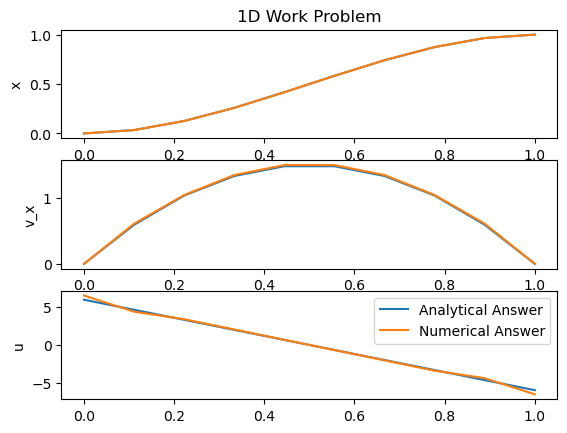

In [3]:
import sys
sys.path.append("..") # treating this as a jupyter-like cell requires adding one directory up
sys.path.append("../pyeq2orb") # and this line is needed for running like a normal python script
# these two appends do not conflict with eachother
import matplotlib.pyplot as plt
import pyeq2orb.Problems.OneDimensionalMinimalWorkProblem as OneDWorkProblemModule
from pyeq2orb.Solvers.ScipyDiscretizationMinimizeWrapper import ScipyDiscretizationMinimizeWrapper

n = 9 # coarse enough to see a small difference from the analytical solution
oneDWorkProblem = OneDWorkProblemModule.OneDWorkProblem()
scipySolver = ScipyDiscretizationMinimizeWrapper(oneDWorkProblem)
ans = scipySolver.ScipyOptimize(n)
plotableNumericalAnswer = scipySolver.ConvertScipyOptimizerOutputToDictionary(ans)

print(ans.success)
print(ans.message)

t = oneDWorkProblem.CreateTimeRange(n)
analyticalAnswerEvaluator = OneDWorkProblemModule.AnalyticalAnswerToProblem()
analyticalAnswer = analyticalAnswerEvaluator.EvaluateAnswer(oneDWorkProblem, t)

fig = plt.figure()
oneDWorkProblem.AddResultsToFigure(fig, t, analyticalAnswer, "Analytical Answer")
oneDWorkProblem.AddResultsToFigure(fig, t, plotableNumericalAnswer, "Numerical Answer")
plt.show()

By using only 9 points we keep the problem fast, but we also see some small deviation between the analytical and numerical solution.